In [1]:
import wandb
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.metrics import f1_score
from wandb.lightgbm import wandb_callback, log_summary

/Users/dragos/anaconda3/envs/lgbm/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
wandb.login()

wandb: Currently logged in as: d-a-pop (midigpt). Use `wandb login --relogin` to force relogin


True

## Increasing the number of iterations (200)

In [3]:
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")

In [4]:
train['user_id'] = train['user_id'].astype("category")
train['review_id'] = train['review_id'].astype("category")
train['book_id'] = train['book_id'].astype("category")
train = train.drop("review_text", axis=1)

In [5]:
val['user_id'] = val['user_id'].astype("category")
val['review_id'] = val['review_id'].astype("category")
val['book_id'] = val['book_id'].astype("category")
val = val.drop("review_text", axis=1)

In [6]:
model3 = lgb.LGBMClassifier(n_estimators=200)

In [7]:
train_config = model3.get_params()

In [8]:
run = wandb.init(project="Goodreads Books Reviews", entity="d-a-pop", job_type="training", config=train_config)

wandb: Currently logged in as: d-a-pop. Use `wandb login --relogin` to force relogin


In [9]:
def evaluate_macroF1_lgb(truth, predictions):  
    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483
    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)
    f1 = f1_score(truth, pred_labels, average='macro')
    return ('macroF1', f1, True) 

In [10]:
%%time
gbm = model3.fit(train.drop("rating", axis=1), train["rating"], callbacks=[wandb_callback()], \
                 categorical_feature=["user_id", "book_id", "review_id"], eval_metric=evaluate_macroF1_lgb, \
                 eval_set=[(train.drop("rating", axis=1), train["rating"]), (val.drop("rating", axis=1), val["rating"])], \
                 eval_names=["training", "validation"]);

/Users/dragos/anaconda3/envs/lgbm/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/dragos/anaconda3/envs/lgbm/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['book_id', 'review_id', 'user_id']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/dragos/anaconda3/envs/lgbm/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/dragos/anaconda3/envs/lgbm/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[1]	training's multi_logloss: 1.4407	training's macroF1: 0.129422	validation's multi_logloss: 1.44136	validation's macroF1: 0.126793
[2]	training's multi_logloss: 1.41794	training's macroF1: 0.166884	validation's multi_logloss: 1.42109	validation's macroF1: 0.160062
[3]	training's multi_logloss: 1.40037	training's macroF1: 0.186772	validation's multi_logloss: 1.40557	validation's macroF1: 0.180787
[4]	training's multi_logloss: 1.38598	training's macroF1: 0.211647	validation's multi_logloss: 1.39335	validation's macroF1: 0.20397
[5]	training's multi_logloss: 1.37343	training's macroF1: 0.234087	validation's multi_logloss: 1.38286	validation's macroF1: 0.22555
[6]	training's multi_logloss: 1.36292	training's macroF1: 0.249768	validation's multi_logloss: 1.37423	validation's macroF1: 0.240421
[7]	training's multi_logloss: 1.3535	training's macroF1: 0.261333	validation's multi_logloss: 1.36793	validation's macroF1: 0.24707
[8]	training's multi_logloss: 1.34488	training's macroF1: 0.270676	

[62]	training's multi_logloss: 1.17137	training's macroF1: 0.434073	validation's multi_logloss: 1.25994	validation's macroF1: 0.363896
[63]	training's multi_logloss: 1.16964	training's macroF1: 0.435591	validation's multi_logloss: 1.2592	validation's macroF1: 0.364722
[64]	training's multi_logloss: 1.16808	training's macroF1: 0.437168	validation's multi_logloss: 1.25862	validation's macroF1: 0.365087
[65]	training's multi_logloss: 1.16661	training's macroF1: 0.438488	validation's multi_logloss: 1.25797	validation's macroF1: 0.36574
[66]	training's multi_logloss: 1.16508	training's macroF1: 0.439951	validation's multi_logloss: 1.25733	validation's macroF1: 0.366222
[67]	training's multi_logloss: 1.16358	training's macroF1: 0.441174	validation's multi_logloss: 1.25682	validation's macroF1: 0.366757
[68]	training's multi_logloss: 1.16187	training's macroF1: 0.442912	validation's multi_logloss: 1.25632	validation's macroF1: 0.367173
[69]	training's multi_logloss: 1.16039	training's macroF1

[123]	training's multi_logloss: 1.09782	training's macroF1: 0.497502	validation's multi_logloss: 1.23649	validation's macroF1: 0.386086
[124]	training's multi_logloss: 1.09673	training's macroF1: 0.498487	validation's multi_logloss: 1.23629	validation's macroF1: 0.386284
[125]	training's multi_logloss: 1.09581	training's macroF1: 0.499318	validation's multi_logloss: 1.23601	validation's macroF1: 0.386573
[126]	training's multi_logloss: 1.09489	training's macroF1: 0.500102	validation's multi_logloss: 1.23579	validation's macroF1: 0.386444
[127]	training's multi_logloss: 1.09396	training's macroF1: 0.500962	validation's multi_logloss: 1.23555	validation's macroF1: 0.38667
[128]	training's multi_logloss: 1.09312	training's macroF1: 0.501893	validation's multi_logloss: 1.23536	validation's macroF1: 0.386722
[129]	training's multi_logloss: 1.09217	training's macroF1: 0.502615	validation's multi_logloss: 1.23514	validation's macroF1: 0.387303
[130]	training's multi_logloss: 1.09132	training'

[184]	training's multi_logloss: 1.05069	training's macroF1: 0.537483	validation's multi_logloss: 1.22894	validation's macroF1: 0.395919
[185]	training's multi_logloss: 1.05007	training's macroF1: 0.537897	validation's multi_logloss: 1.22886	validation's macroF1: 0.396037
[186]	training's multi_logloss: 1.04944	training's macroF1: 0.538355	validation's multi_logloss: 1.2288	validation's macroF1: 0.396045
[187]	training's multi_logloss: 1.04871	training's macroF1: 0.538808	validation's multi_logloss: 1.22876	validation's macroF1: 0.396308
[188]	training's multi_logloss: 1.04816	training's macroF1: 0.539324	validation's multi_logloss: 1.22866	validation's macroF1: 0.39636
[189]	training's multi_logloss: 1.04745	training's macroF1: 0.539897	validation's multi_logloss: 1.22861	validation's macroF1: 0.396372
[190]	training's multi_logloss: 1.04691	training's macroF1: 0.540337	validation's multi_logloss: 1.22856	validation's macroF1: 0.396609
[191]	training's multi_logloss: 1.04622	training's

In [11]:
model3.booster_.save_model('model3.txt')

In [13]:
ypred3_ = model3.predict_proba(val.drop("rating", axis=1))
ypred3 = np.argmax(ypred3_, axis=1)

In [14]:
predictions = val[["review_id", "rating"]]
predictions["pred"] = ypred3

<ipython-input-14-495db254e0b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions["pred"] = ypred3


In [15]:
table = wandb.Table(dataframe=predictions)

In [16]:
wandb.log({"pred_table":table})

In [17]:
f1 = f1_score(val['rating'], ypred3, average='macro')
print(f1)

0.39712511317642535


<ipython-input-18-c01bc6f8c6e1>:1: UserWarning: More than one metric available, picking one to plot.
  lgb.plot_metric(model3, grid=True, figsize=(12, 8));


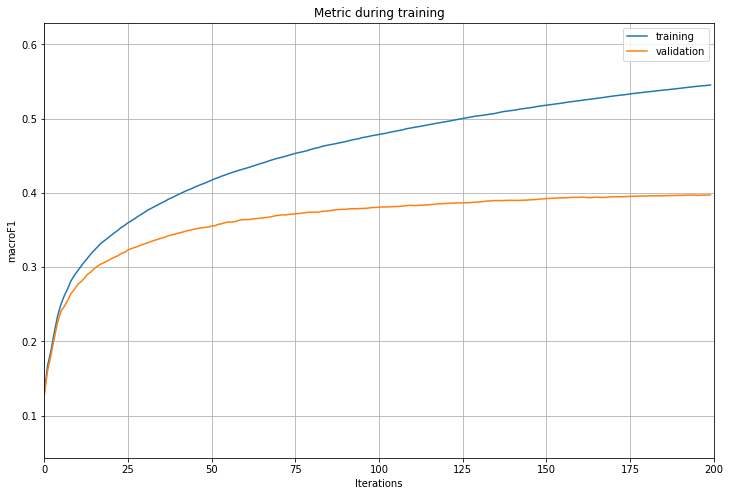

In [18]:
lgb.plot_metric(model3, grid=True, figsize=(12, 8));

In [19]:
log_summary(gbm.booster_)

In [20]:
run.finish()

iteration,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
training_macroF1,▁▃▃▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇██████████
training_multi_logloss,█▇▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
validation_macroF1,▁▃▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇████████████████████
validation_multi_logloss,█▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_iteration,0
iteration,199
training_macroF1,0.5452
validation_macroF1,0.39713


## Continue training 200 more iterations

In [32]:
run = wandb.init(project="Goodreads Books Reviews", entity="d-a-pop", job_type="training")

In [33]:
model4 = lgb.LGBMClassifier()

In [34]:
%%time
gbm1 = model4.fit(train.drop("rating", axis=1), train["rating"], callbacks=[wandb_callback()], \
                  categorical_feature=["user_id", "book_id", "review_id"], eval_metric=evaluate_macroF1_lgb, \
                 eval_set=[(train.drop("rating", axis=1), train["rating"]), (val.drop("rating", axis=1), val["rating"])], \
                 eval_names=["training", "validation"], init_model=model3);

[201]	training's multi_logloss: 1.04001	training's macroF1: 0.545595	validation's multi_logloss: 1.22857	validation's macroF1: 0.397509
[202]	training's multi_logloss: 1.0395	training's macroF1: 0.546128	validation's multi_logloss: 1.22854	validation's macroF1: 0.397533
[203]	training's multi_logloss: 1.03891	training's macroF1: 0.546554	validation's multi_logloss: 1.22845	validation's macroF1: 0.397588
[204]	training's multi_logloss: 1.03851	training's macroF1: 0.546783	validation's multi_logloss: 1.22843	validation's macroF1: 0.397699
[205]	training's multi_logloss: 1.03781	training's macroF1: 0.547303	validation's multi_logloss: 1.22843	validation's macroF1: 0.397567
[206]	training's multi_logloss: 1.03709	training's macroF1: 0.547848	validation's multi_logloss: 1.22847	validation's macroF1: 0.398085
[207]	training's multi_logloss: 1.03647	training's macroF1: 0.548324	validation's multi_logloss: 1.22847	validation's macroF1: 0.398115
[208]	training's multi_logloss: 1.03581	training'

[262]	training's multi_logloss: 1.0055	training's macroF1: 0.573302	validation's multi_logloss: 1.22793	validation's macroF1: 0.402265
[263]	training's multi_logloss: 1.00503	training's macroF1: 0.573778	validation's multi_logloss: 1.22801	validation's macroF1: 0.401882
[264]	training's multi_logloss: 1.00441	training's macroF1: 0.574246	validation's multi_logloss: 1.228	validation's macroF1: 0.401975
[265]	training's multi_logloss: 1.00388	training's macroF1: 0.574706	validation's multi_logloss: 1.22805	validation's macroF1: 0.40202
[266]	training's multi_logloss: 1.00342	training's macroF1: 0.57509	validation's multi_logloss: 1.22806	validation's macroF1: 0.402254
[267]	training's multi_logloss: 1.00301	training's macroF1: 0.575494	validation's multi_logloss: 1.22811	validation's macroF1: 0.40237
[268]	training's multi_logloss: 1.0023	training's macroF1: 0.575833	validation's multi_logloss: 1.22814	validation's macroF1: 0.402474
[269]	training's multi_logloss: 1.00164	training's macr

In [35]:
ypred4_ = model4.predict_proba(val.drop("rating", axis=1))
ypred4 = np.argmax(ypred3_, axis=1)

In [36]:
predictions = val[["review_id", "rating"]]
predictions["pred"] = ypred3

<ipython-input-36-495db254e0b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions["pred"] = ypred3


In [37]:
table = wandb.Table(dataframe=predictions)

In [38]:
wandb.log({"pred_table":table})

In [39]:
log_summary(gbm.booster_)

In [40]:
run.finish()

iteration,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
training_macroF1,▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇████
training_multi_logloss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
validation_macroF1,▁▁▂▂▂▂▂▂▃▃▄▄▄▅▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▆▆▇▇▇▇█████
validation_multi_logloss,▇▆▆▆▅▆▅▄▄▃▄▂▃▃▃▃▃▂▂▂▃▁▁▁▁▂▃▃▃▃▃▄▅▅▇▇▇▇▇█
best_iteration,0
iteration,299
training_macroF1,0.58705
validation_macroF1,0.40373


## Submission

In [41]:
test = pd.read_csv("test.csv")

In [42]:
r = test["review_id"]

In [43]:
test['user_id'] = test['user_id'].astype("category")
test['review_id'] = test['review_id'].astype("category")
test['book_id'] = test['book_id'].astype("category")
test = test.drop("review_text", axis=1)

In [44]:
p = model4.predict_proba(test)
s = pd.Series(np.argmax(p, axis=1))

In [45]:
len(s)

478033

In [46]:
len(test)

478033

In [47]:
submission = pd.concat([r,s],axis=1).rename(columns={0: "rating"})

In [48]:
submission

,review_id,rating
0,5c4df7e70e9b438c761f07a4620ccb7c,4
1,8eaeaf13213eeb16ad879a2a2591bbe5,3
2,dce649b733c153ba5363a0413cac988f,4
3,8a46df0bb997269d6834f9437a4b0a77,4
4,d11d3091e22f1cf3cb865598de197599,3
...,...,...
478028,0e1db3d4b04256f9660f5d276ddf1314,5
478029,0b7f352e58caf0fd1f961e98ef04e89c,0
478030,9b19eff33ddb14e9e68fca2e90379e46,5
478031,8be463fed78f0da63e964706f710332b,5


In [49]:
submission.to_csv("sub4.csv", index=False)